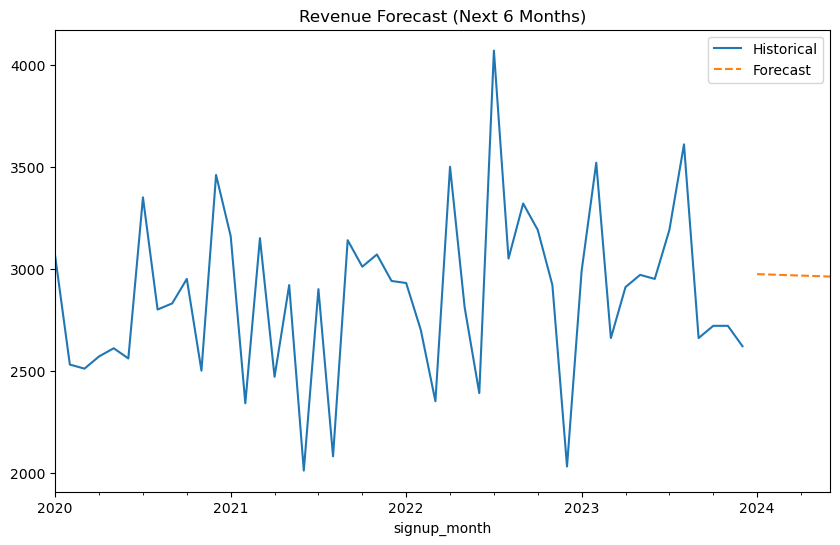

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


df = pd.read_csv("saas_customer_data.csv", parse_dates=['signup_date'])
df['signup_month'] = df['signup_date'].dt.to_period('M')


monthly_revenue = df.groupby('signup_month')['monthly_revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Forecast
model = ExponentialSmoothing(monthly_revenue, trend='add', seasonal=None).fit()
forecast = model.forecast(6)


plt.figure(figsize=(10,6))
monthly_revenue.plot(label='Historical')
forecast.plot(label='Forecast', linestyle='--')
plt.title("Revenue Forecast (Next 6 Months)")
plt.legend()
plt.show()
